<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:ahmadreza majlesara

**Student ID**:400101861



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


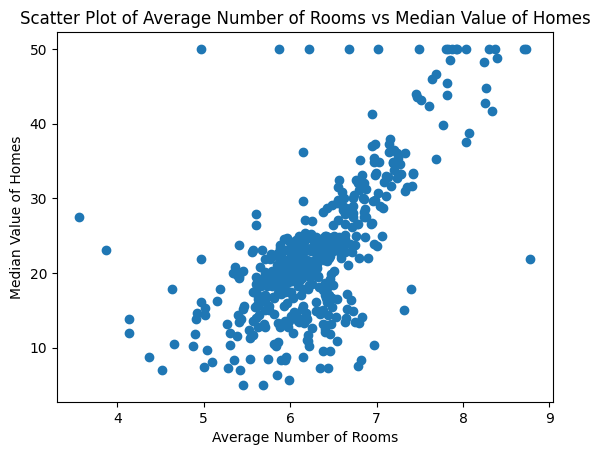

In [26]:
df = pd.read_csv('boston.csv')
print(df.head())
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.title('Scatter Plot of Average Number of Rooms vs Median Value of Homes')
plt.show()

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [27]:

train_df, test_df = train_test_split(df, test_size=0.2, random_state=50)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
model = LinearRegression()
model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
train_pred = model.predict(train_df.drop('MEDV', axis=1))
test_pred = model.predict(test_df.drop('MEDV', axis=1))

train_r2 = r2_score(train_df['MEDV'], train_pred)
test_r2 = r2_score(test_df['MEDV'], test_pred)

train_rmse = mean_squared_error(train_df['MEDV'], train_pred, squared=False)
test_rmse = mean_squared_error(test_df['MEDV'], test_pred, squared=False)

coefficients = model.coef_

print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Coefficients:", coefficients)

Train set shape: (404, 14)
Test set shape: (102, 14)
Train R^2: 0.7532907239751999
Test R^2: 0.6573857941343245
Train RMSE: 4.614331990503535
Test RMSE: 5.132790407109295
Coefficients: [-1.04683734e-01  3.94173679e-02  5.97497992e-02  8.49189549e-01
 -2.11417205e+01  4.18935210e+00  6.15729868e-03 -1.45337348e+00
  2.97609192e-01 -1.36194161e-02 -1.09117880e+00  7.84352525e-03
 -4.77003618e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [28]:

alphas = 10**np.linspace(3,-3,100)*0.5
trainr2s = []
testr2s = []
trainrmses = []
testrmses = []
coefficients = []
num_not_considered = []

for alpha in alphas:
    ridge_model = RidgeCV(alphas=[alpha], cv=5)
    ridge_model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
    
    train_pred = ridge_model.predict(train_df.drop('MEDV', axis=1))
    test_pred = ridge_model.predict(test_df.drop('MEDV', axis=1))
    
    train_mse = mean_squared_error(train_df['MEDV'], train_pred)
    test_mse = mean_squared_error(test_df['MEDV'], test_pred)
    
    trainrmses.append(train_mse)
    testrmses.append(test_mse)
    coefficients.append(ridge_model.coef_)

    not_considered = np.sum(np.isclose(ridge_model.coef_, 0, atol=0.5))
    num_not_considered.append(not_considered)



coefficients = np.array(coefficients)

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

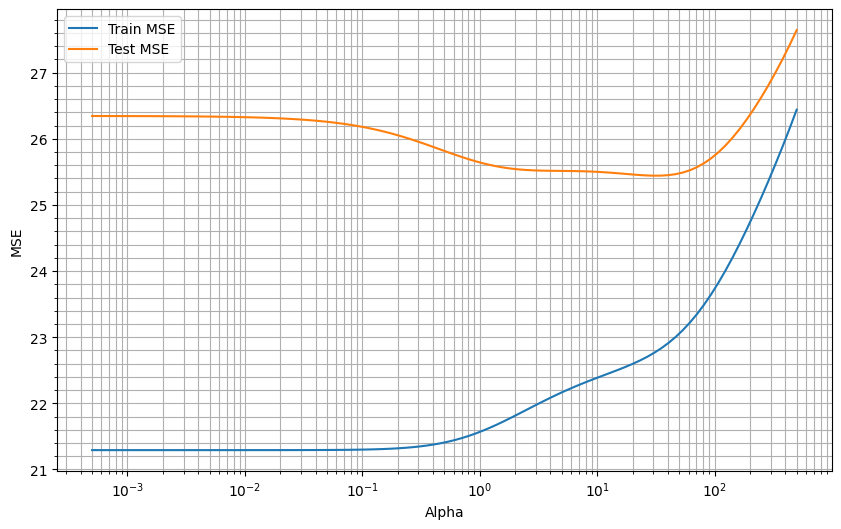

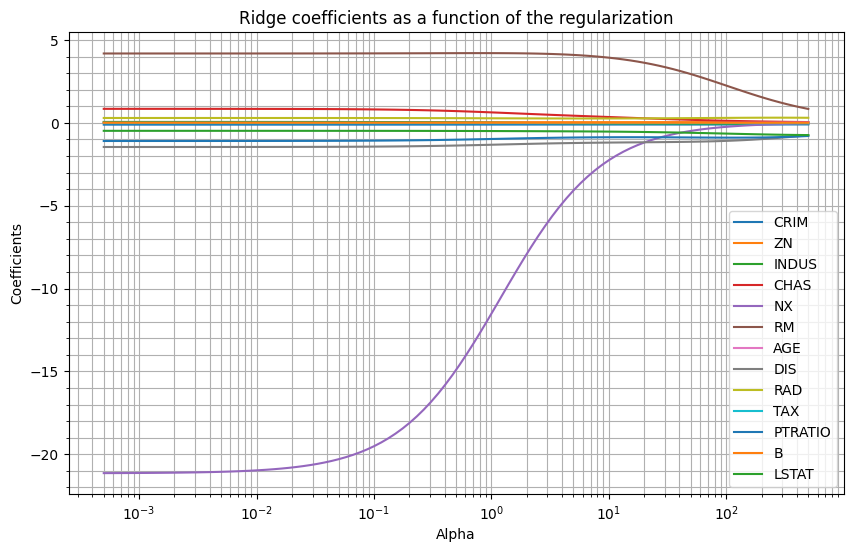

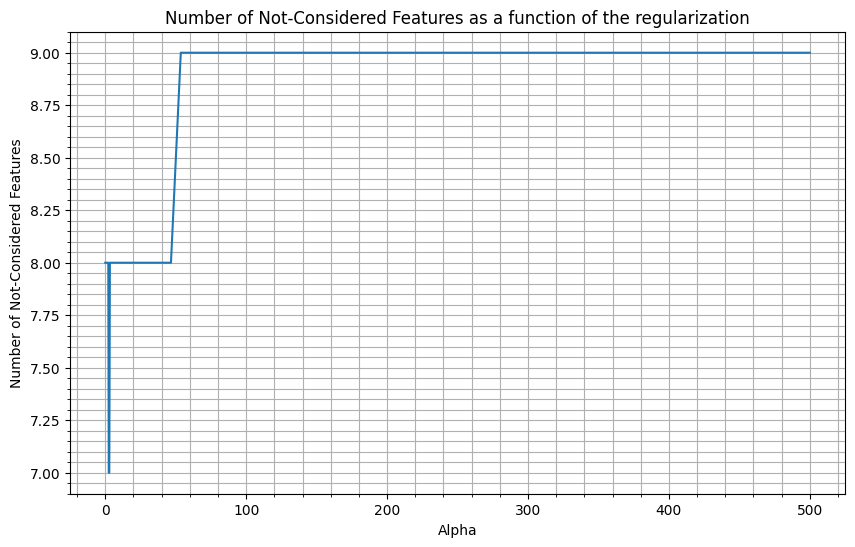

ridge regression
Optimal Alpha: 0.1004616501282523
Training MSE: 21.300018363537163
Training R^2: 0.7531985078363949
Test MSE: 26.179860414055458
Test R^2: 0.6595403630701335


In [32]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, trainrmses, label='Train MSE')
plt.plot(alphas, testrmses, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True , which='both')
plt.minorticks_on()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.grid(True , which='both')
plt.minorticks_on()
plt.legend(train_df.drop('MEDV', axis=1).columns)
plt.show()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, num_not_considered)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.grid(True , which='both')
plt.title('Number of Not-Considered Features as a function of the regularization')
plt.minorticks_on()
plt.show()

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])

optimal_alpha = ridge_model.alpha_
print('ridge regression')
print(f'Optimal Alpha: {optimal_alpha}')

train_pred = ridge_model.predict(train_df.drop('MEDV', axis=1))
test_pred = ridge_model.predict(test_df.drop('MEDV', axis=1))

train_mse = mean_squared_error(train_df['MEDV'], train_pred)
train_r2 = r2_score(train_df['MEDV'], train_pred)
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')

test_mse = mean_squared_error(test_df['MEDV'], test_pred)
test_r2 = r2_score(test_df['MEDV'], test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R^2: {test_r2}')


In [19]:
model = LinearRegression()
model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
train_pred = model.predict(train_df.drop('MEDV', axis=1))
test_pred = model.predict(test_df.drop('MEDV', axis=1))

train_r2 = r2_score(train_df['MEDV'], train_pred)
test_r2 = r2_score(test_df['MEDV'], test_pred)

train_rmse = mean_squared_error(train_df['MEDV'], train_pred, squared=False)
test_rmse = mean_squared_error(test_df['MEDV'], test_pred, squared=False)

print("Linear regression")
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Linear regression
Train R^2: 0.7283907758570181
Test R^2: 0.8338676367584109
Train RMSE: 4.768163400172554
Test RMSE: 3.8833924769219172


<span style="color:pink;">

### Analysis
- **Training Performance**: Ridge Regression demonstrates a higher R² value in training (0.7532) compared to Linear Regression (0.7284), indicating better fit to the training data. However, the training RMSE for Linear Regression is lower, suggesting less error in the predictions.
- **Test Performance**: Linear Regression significantly outperforms Ridge Regression in test R² (0.8339 vs 0.6595), showing better generalization on unseen data. The lower Test RMSE in Linear Regression further confirms its superior performance in testing.
- **Regularization Effect**: The use of Ridge Regression with an optimal alpha of 0.1004616501282523 indicates an attempt to control for overfitting through regularization, which is effective in improving training performance but does not translate as well into the test data compared to the simpler Linear Regression model.

### Conclusion
While Ridge Regression shows reliable training results, Linear Regression provides stronger performance on test data, indicating better generalization capabilities. This suggests that for this particular dataset, the simplicity of the Linear Regression model without regularization is more effective, especially in terms of accuracy and error reduction on unseen data.

</span>


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

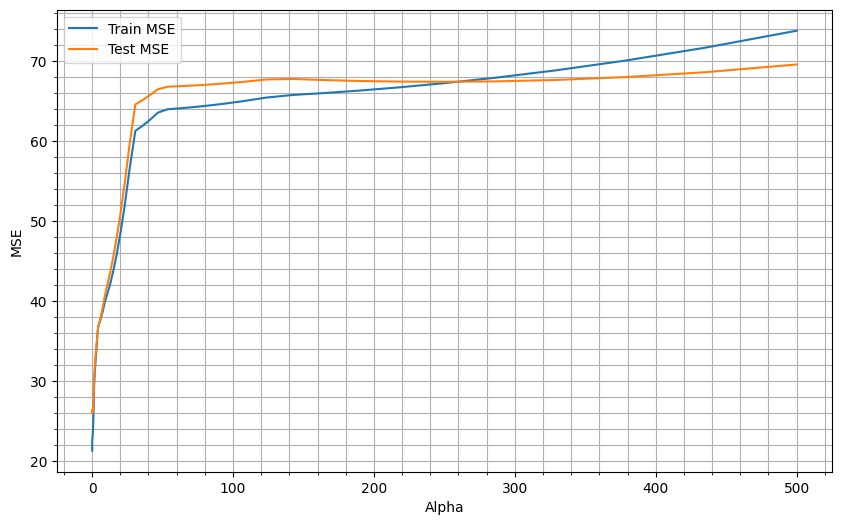

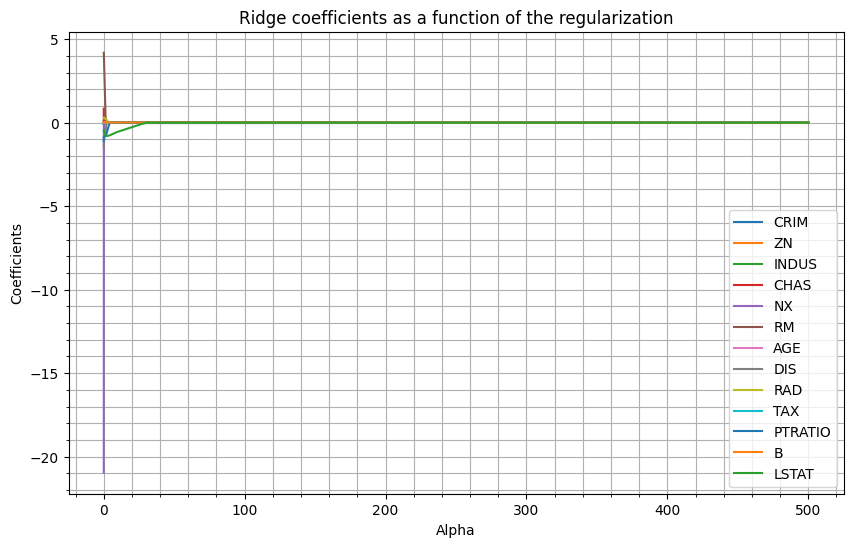

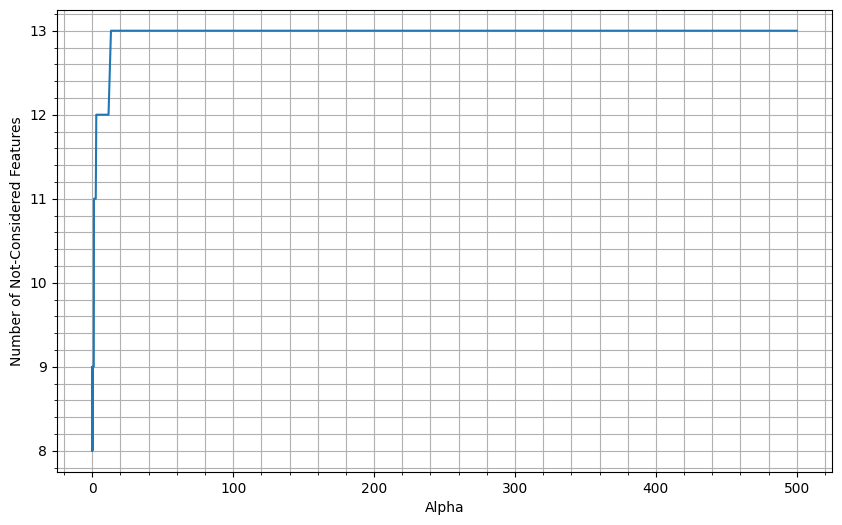

Optimal Alpha: 0.002018508629298275
Training MSE: 21.293649218744072
Training R^2: 0.753272306572711
Test MSE: 26.306543827948804
Test R^2: 0.6578928909898007


In [6]:
alphas = 10**np.linspace(3,-3,100)*0.5
trainr2s = []
testr2s = []
trainrmses = []
testrmses = []
coefficients = []
num_not_considered = []

for alpha in alphas:
    lasso_model = LassoCV(alphas=[alpha], cv=5)
    lasso_model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
    
    train_pred = lasso_model.predict(train_df.drop('MEDV', axis=1))
    test_pred = lasso_model.predict(test_df.drop('MEDV', axis=1))
    
    train_mse = mean_squared_error(train_df['MEDV'], train_pred)
    test_mse = mean_squared_error(test_df['MEDV'], test_pred)
    
    trainrmses.append(train_mse)
    testrmses.append(test_mse)
    coefficients.append(lasso_model.coef_)

    not_considered = np.sum(np.isclose(lasso_model.coef_, 0, atol=0.5))
    num_not_considered.append(not_considered)

coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
plt.plot(alphas, trainrmses, label='Train MSE')
plt.plot(alphas, testrmses, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True , which='both')
plt.minorticks_on()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.grid(True , which='both')
plt.minorticks_on()
plt.legend(train_df.drop('MEDV', axis=1).columns)
plt.show()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, num_not_considered)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.grid(True , which='both')
plt.minorticks_on()
plt.show()

lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])

optimal_alpha = lasso_model.alpha_
print(f'Optimal Alpha: {optimal_alpha}')

train_pred = lasso_model.predict(train_df.drop('MEDV', axis=1))
test_pred = lasso_model.predict(test_df.drop('MEDV', axis=1))

train_mse = mean_squared_error(train_df['MEDV'], train_pred)
train_r2 = r2_score(train_df['MEDV'], train_pred)
print(f'Training MSE: {train_mse}')
print(f'Training R^2: {train_r2}')

test_mse = mean_squared_error(test_df['MEDV'], test_pred)
test_r2 = r2_score(test_df['MEDV'], test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R^2: {test_r2}')

<span style="color:pink;">

It appears that Lasso has slightly improved the training R² compared to Ridge, indicating a minor enhancement in model fit. However, the test R² is slightly lower than that of Ridge, suggesting a marginal decrease in how well the model generalizes. This could indicate that while Lasso is effective at feature reduction and model simplification, it might be sacrificing some ability to capture variance in the test data compared to Ridge or even simple linear models.

### Conclusion

Lasso should be considered when you need a model that is easy to interpret and when feature reduction is a priority. Assess whether the slight decrease in test performance is a worthy trade-off for simpler, more interpretable models in your specific application or domain. If the primary goal is prediction accuracy without the necessity of interpreting the model, other models might be more appropriate.

</span>


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

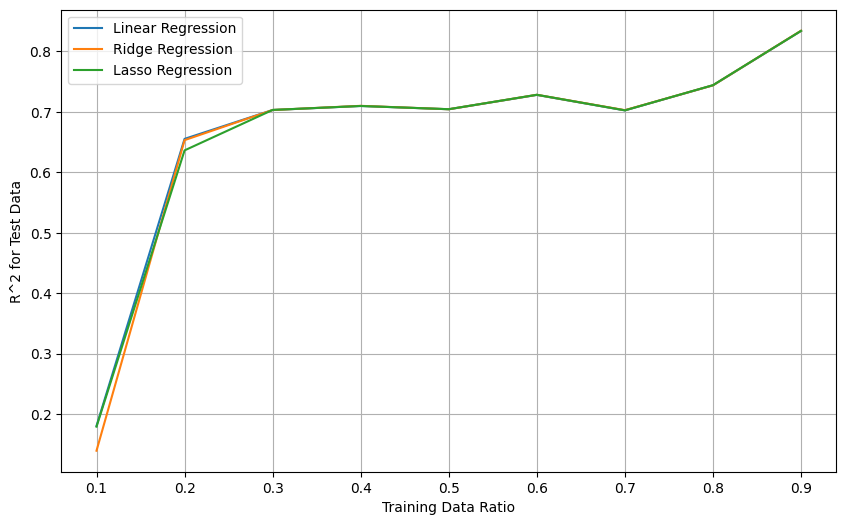

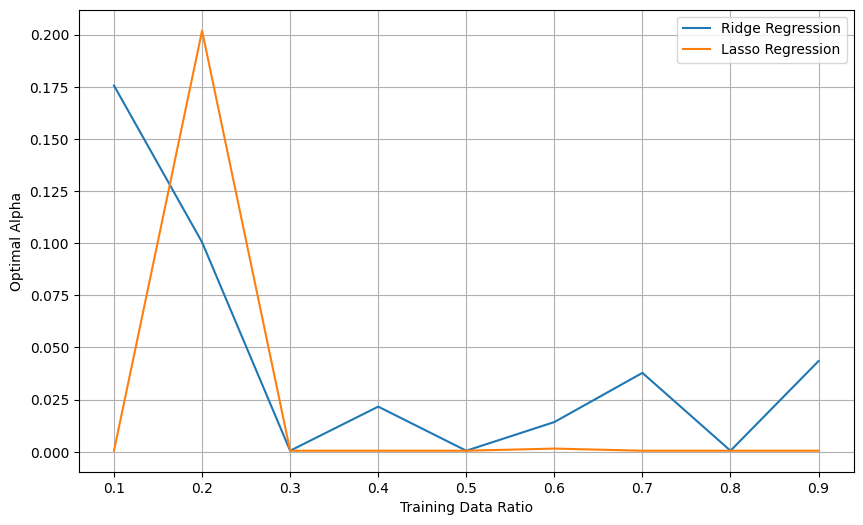

In [7]:
train_sizes = np.linspace(0.1, 0.9, 9)
LRresults = []
RidgeResults = []
LassoResults = []
Ridgalphas = []
Lassalphas = []
for size in train_sizes:
    train_df, test_df = train_test_split(df, train_size=size, random_state=20)
    LRmodel = LinearRegression().fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
    LRtrain_pred = LRmodel.predict(train_df.drop('MEDV', axis=1))
    LRtest_pred = LRmodel.predict(test_df.drop('MEDV', axis=1))
    LRtrain_r2 = r2_score(train_df['MEDV'], LRtrain_pred)
    LRtest_r2 = r2_score(test_df['MEDV'], LRtest_pred)
    LRresults.append(LRtest_r2)
    RidgeModel = RidgeCV(alphas=alphas, cv=5).fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
    RidgeTrain_pred = RidgeModel.predict(train_df.drop('MEDV', axis=1))
    RidgeTest_pred = RidgeModel.predict(test_df.drop('MEDV', axis=1))
    Ridgetrain_r2 = r2_score(train_df['MEDV'], RidgeTrain_pred)
    Ridgetest_r2 = r2_score(test_df['MEDV'], RidgeTest_pred)
    RidgeResults.append(Ridgetest_r2)
    Ridgalphas.append(RidgeModel.alpha_)
    LassoModel = LassoCV(alphas=alphas, cv=5).fit(train_df.drop('MEDV', axis=1), train_df['MEDV'])
    LassoTrain_pred = LassoModel.predict(train_df.drop('MEDV', axis=1))
    LassoTest_pred = LassoModel.predict(test_df.drop('MEDV', axis=1))
    Lassotrain_r2 = r2_score(train_df['MEDV'], LassoTrain_pred)
    Lassotest_r2 = r2_score(test_df['MEDV'], LassoTest_pred)
    LassoResults.append(Lassotest_r2)
    Lassalphas.append(LassoModel.alpha_)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, LRresults, label='Linear Regression')
plt.plot(train_sizes, RidgeResults, label='Ridge Regression')
plt.plot(train_sizes, LassoResults, label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('R^2 for Test Data')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, Ridgalphas, label='Ridge Regression')
plt.plot(train_sizes, Lassalphas, label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('Optimal Alpha')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:pink;">

### $R^2$ for Test Data vs. Ratio of Training Data

As the ratio of training data increases, utilizing more data for training typically results in higher $R^2$ values for test data across all three regression methods. Linear regression, however, may begin to overfit as the training data ratio decreases, consequently leading to diminished $R^2$ values on test data when compared to Ridge and Lasso regressions. Ridge regression demonstrates a more consistent and gradual increase in $R^2$, reflecting its capacity to mitigate overfitting through the penalization of large coefficients. Lasso regression, known for its feature selection capabilities, might display a more pronounced increase in $R^2$ at lower training data ratios relative to both linear and Ridge regressions. As the training data ratio increases, the plot is likely to exhibit a convergence or stabilization in $R^2$ values for the test data.

### Selected Alpha Value vs. Ratio of Training Data

With an increase in the training data ratio, the selected alpha (α) values for both Ridge and Lasso regressions tend to decrease. This trend suggests that less regularization is necessary as more data is available for training, thus diminishing the alpha values. The plot is expected to illustrate a decreasing trajectory in α values as the training data ratio rises, signifying a reduced need for regularization as the risk of overfitting decreases with more extensive training data.

</span>
